# Python Data Analysis - Final project

## Context

This final project is based on a real data analyst life scenario:

You’ve just been hired as a Data Analyst at “Home Credit”, a loan company, and a business owner comes to you.

Business Owner: “Hey you’re the new kid? Doing nerdy stuff eh? Here is some data for ya”.

*He hands you a USB key*

Business Owner: “You’re welcome. Now do some magic with it”.

*And then he stays there looking fixedly at your laptop screen…*
*awkward silence*
*It’s like he’s waiting for you to do something*

Alright the context is set, now you know what to do (or not). Let’s look at the data!


## Data

You find 8 csv files inside his USB device, along with a readme file describing which file is what :

- application_{train|test}.csv
 - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
 - Static data for all applications. One row represents one loan in our data sample.
- bureau.csv
 - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
 - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
- bureau_balance.csv
 - Monthly balances of previous credits in Credit Bureau.
 - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
- POS_CASH_balance.csv
 - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
- credit_card_balance.csv
 - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
- previous_application.csv
 - All previous applications for Home Credit loans of clients who have loans in our sample.
 - There is one row for each previous application related to loans in our data sample.
- installments_payments.csv
 - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
 - There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
- HomeCredit_columns_description.csv
 - This file contains descriptions for the columns in the various data files.
 
It looks like data about loan applications and applicants.


 
(This diagram gives joining keys to merge datasets altogether)

![im3.jpeg](im3.png)



# 1. Introduction: what is at stake ?

Here at Home Credit, we all know what we do, right ? We sell loans to unbanked clients in order to allow them buying what they need for their home and get comfy.
And as "an international consumer finance provider with operations in 9 countries", we have the responsibility to stay solvent, both for us and our clients. 


But you know better than me that it is then quite difficult, since "we focus on responsible lending primarily to people with little or no credit history. Our services are simple, easy and fast", to guess if a client is creditworthy or not (i.e. will he pay on time his debts ?)

Moreover, as a loan provider, we also want to maximize the interest rate negociated with a client.

With this presentation, I'll try to put some light on these two question marks and try to answer them !

Two questions:
* On which generic profile of applicants should we focus on in order to find the *less risky ones*?
* On which criteria should we base our analysis to *maximize the interest rate* of a loan ?

# 2. All the stuff we do before, to present to you a better analysis

In [99]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

## 2.1 Data collection

In [100]:
application_test = pd.read_csv('data/application_test.csv')
application_train = pd.read_csv('data/application_train.csv')
pos_cash = pd.read_csv('data/POS_CASh_balance.csv')
credit_card = pd.read_csv('data/credit_card_balance.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
bureau = pd.read_csv('data/bureau.csv')
previous_application = pd.read_csv('data/previous_application.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
data_description = pd.read_csv('data/HomeCredit_columns_description.csv',encoding='latin1')

## 2.2 Data cleaning

In [101]:
#Using a for loop in Python to figure out the number of missing values in each column
missing_data_application_train = application_train.isnull()
most_missing = pd.DataFrame(columns=['Column','Percentage'])

for column in missing_data_application_train.columns.values.tolist():
    
    if (np.sum(missing_data_application_train[column])/missing_data_application_train[column].count()*100) > 0:
        most_missing = most_missing.append({'Column': column,'Percentage':np.sum(missing_data_application_train[column])/missing_data_application_train[column].count()*100}, ignore_index=True)
    else:
        continue

In [102]:
most_missing.sort_values(by='Percentage',ascending=False).round(1)[most_missing['Percentage'] > 20]

/Users/nicolas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Column,Percentage
41,COMMONAREA_MEDI,69.9
13,COMMONAREA_AVG,69.9
27,COMMONAREA_MODE,69.9
49,NONLIVINGAPARTMENTS_MEDI,69.4
35,NONLIVINGAPARTMENTS_MODE,69.4
21,NONLIVINGAPARTMENTS_AVG,69.4
51,FONDKAPREMONT_MODE,68.4
33,LIVINGAPARTMENTS_MODE,68.4
47,LIVINGAPARTMENTS_MEDI,68.4
19,LIVINGAPARTMENTS_AVG,68.4


We now know what are the features that have the most missing data in it. For now on, we will keep this information and let our dataset with these missing ones, notably for the Correlation Matrix we will plot (see 4.1). Nevertheless we will clean this dataset when we will train our predictive model.

# 3. A general picture of our applicants
* Age
* Gender
* Job
* Family Status

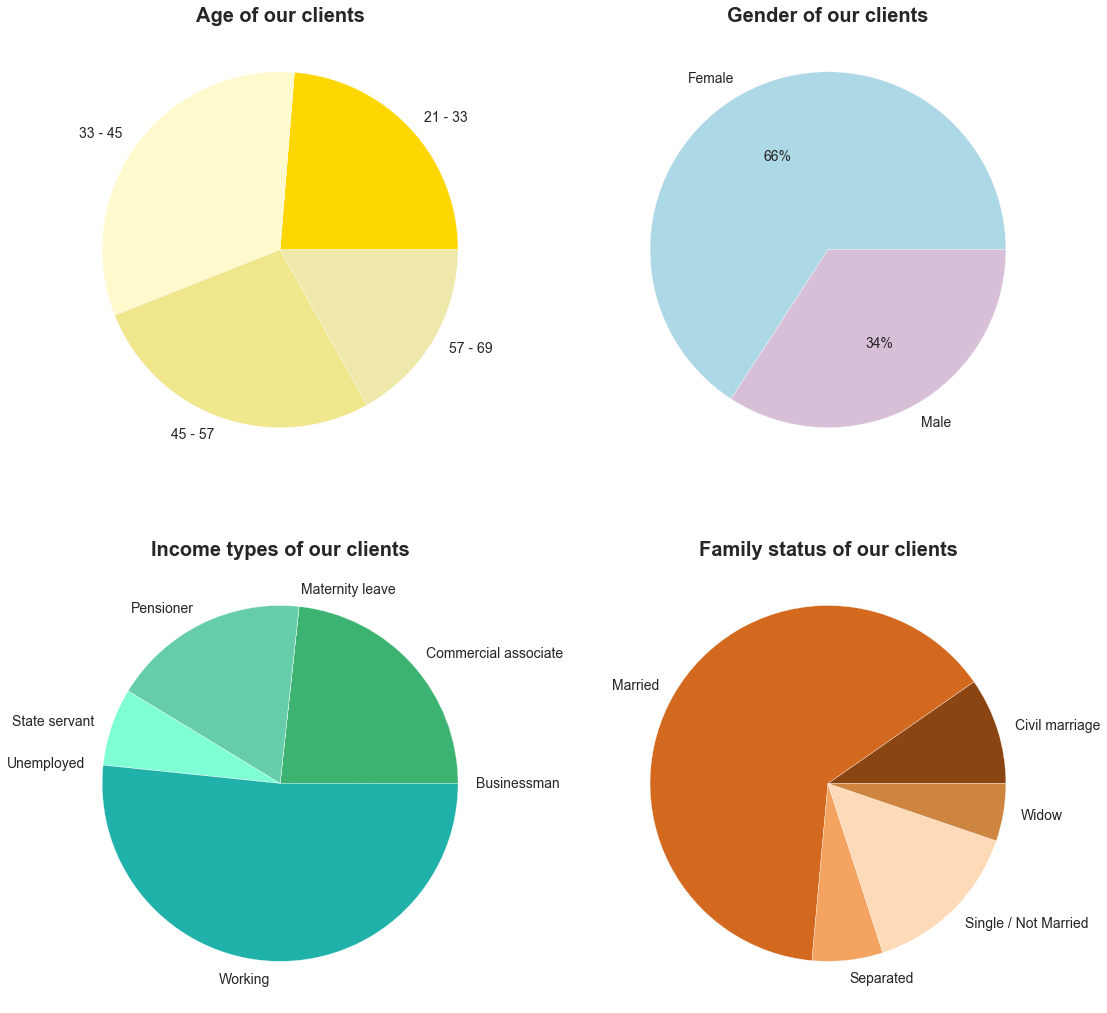

In [103]:
fig, axs = plt.subplots(2, 2,figsize=(18,18))

cols_age = ['gold','lemonchiffon','khaki','palegoldenrod']
cols_gender = ['lightblue','thistle']
cols_income_types = ['seagreen', 'mediumseagreen', 'springgreen', 'mediumaquamarine', 'aquamarine','turquoise','lightseagreen','mediumturquoise']
cols_family_status_types = ['saddlebrown','chocolate','sandybrown','peachpuff', 'peru']

#Age analysis
age = application_train[['DAYS_BIRTH']]
age['YEARS_BIRTH'] = (age['DAYS_BIRTH'] / -365).round(0)
age['AGE_BRACKETS'] = pd.cut(age['YEARS_BIRTH'], 4)
age_intervals = age.groupby(['AGE_BRACKETS']).size()
axs[0, 0].set_title('Age of our clients',fontweight="bold", size=20) # Title
axs[0, 0].pie(age_intervals, labels=['21 - 33',  '33 - 45','45 - 57', '57 - 69'], colors=cols_age,textprops={'fontsize': 14})


#Gender analysis
gender = application_train.loc[application_train['CODE_GENDER'] != 'XNA',:]
def label_function(val):
    return f'{val:.0f}%'
gender = gender.groupby('CODE_GENDER').size() 
axs[0, 1].set_title('Gender of our clients',fontweight="bold", size=20) # Title
axs[0, 1].pie(gender, autopct=label_function,labels=['Female',  'Male'], colors=cols_gender,textprops={'fontsize': 14})


#Income_type_analysis
income_types = application_train.loc[application_train['NAME_INCOME_TYPE'] != 'Student',:]
income_types = income_types.groupby(['NAME_INCOME_TYPE']).size()
axs[1, 0].set_title('Income types of our clients',fontweight="bold", size=20) # Title
axs[1, 0].pie(income_types, labels=['Businessman',  'Commercial associate','Maternity leave', 'Pensioner','State servant','Unemployed','Working' ], colors=cols_income_types,textprops={'fontsize': 14})


#Family status analysis
family_status_types = application_train.loc[application_train['NAME_FAMILY_STATUS'] != 'Unknown',:]
family_status_types = family_status_types.groupby(['NAME_FAMILY_STATUS']).size()
axs[1, 1].set_title('Family status of our clients',fontweight="bold", size=20) # Title
axs[1, 1].pie(family_status_types, labels=['Civil marriage',  'Married','Separated', 'Single / Not Married','Widow' ], colors=cols_family_status_types,textprops={'fontsize': 14})

plt.show()

### *CONCLUSION #1*:  
- The `AGE` of our clients is very well balanced, with a little more of 33 - 45 yo asking for a loan.
- The `SEX` of a client is 'Female' 2 times out of 3, and 'Male' 1 time out of 3
- The vast majority of our clients are all globally working, but quite a few are also pensioners
- Most of our clients are married (civil or religious)

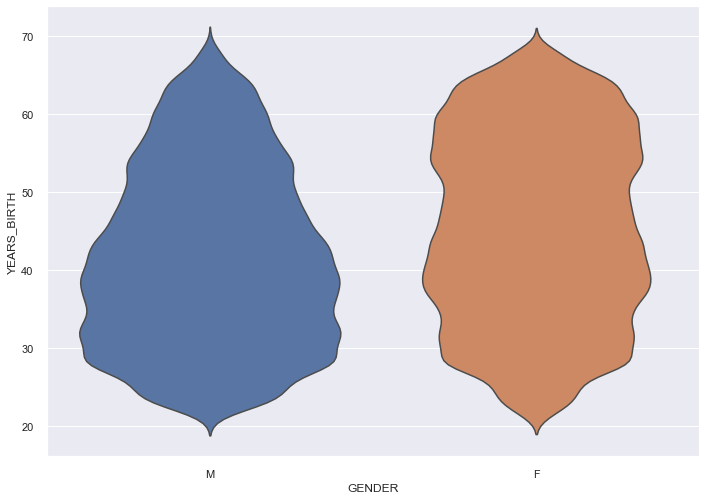

In [104]:
age['GENDER'] = application_train['CODE_GENDER']
age = age.loc[age['GENDER'] != 'XNA']

sns.set(rc={'figure.figsize':(11.7,8.27)})
gender_per_age = sns.violinplot(data=age, x='GENDER', y='YEARS_BIRTH', inner=None)


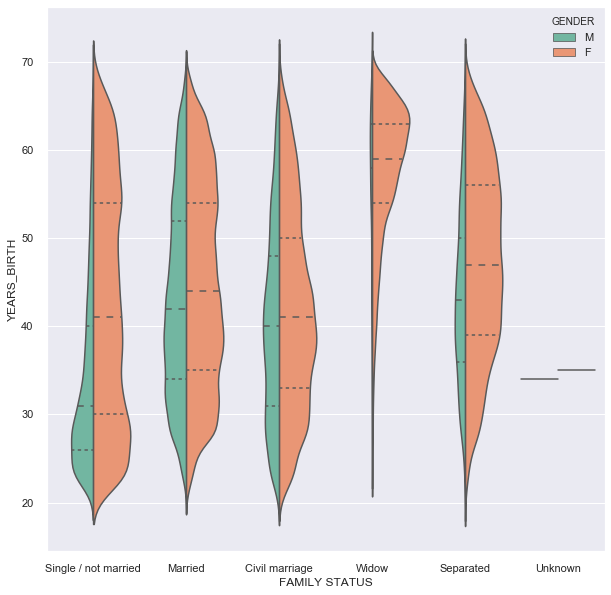

In [105]:
age['FAMILY STATUS'] = application_train['NAME_FAMILY_STATUS']
sns.set(rc={'figure.figsize':(10,10)})
family_status_per_age = sns.violinplot(data=age, x='FAMILY STATUS', y='YEARS_BIRTH',hue='GENDER', palette="Set2", split=True,scale="count", inner="quartile")
#"box" , quartile, stick, point

(I wanted to plot a `swarmplot`here but regarding the number sof observations in our dataset, it is quite demanding in CPU power ...)

### *CONCLUSION #2*:  
- Men appear to be younger than women asking for a loan, but we need to take into consideration the ratio here (66% men, 33% women ==> results in lowering the average age for men) 
- Looking at the 'Widow' feature, it appears normal that only women are described in here
- The married couples asking for a loan are around 42-45 yo in average (civil married clients are slightly younger, 40-42)
- A 10-year difference between single women's average age (41 yo) and single men's average age (31 yo)

# 4. Correlation between features and their importance in our analysis

## 4.1 Correlations of features with the fact that the loans are paid or not (TARGET)

To get a general idea of the correlations from a feature regarding another; we can use the Correlation Pearson Coefficient and interpret it as :
* .00-.19 “Not correlated”
* .20-.39 “Weak correlation”
* .40-.59 “Medium correlation”
* .60-.79 “Strong correlation”
* .80-1.0 “Ultra correlated”

In [106]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()
correlations
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(30))
print('\nMost Negative Correlations:\n', correlations.head(15))
most_correlated_list = list(application_train.corr()['TARGET'].sort_values().tail(30).index)

Most Positive Correlations:
 FLAG_MOBIL                     0.000534
AMT_REQ_CREDIT_BUREAU_WEEK     0.000788
AMT_REQ_CREDIT_BUREAU_HOUR     0.000930
AMT_REQ_CREDIT_BUREAU_DAY      0.002704
LIVE_REGION_NOT_WORK_REGION    0.002819
FLAG_DOCUMENT_21               0.003709
FLAG_DOCUMENT_2                0.005417
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUB

## 4.2 Correlation between features

To analyse which factor is the most correlated with which other one, let's use the ***Pearson Correlation Matrix*** on the top 30 features most correlated to the TARGET feature, to see how this important features of interest are correlated between each other.

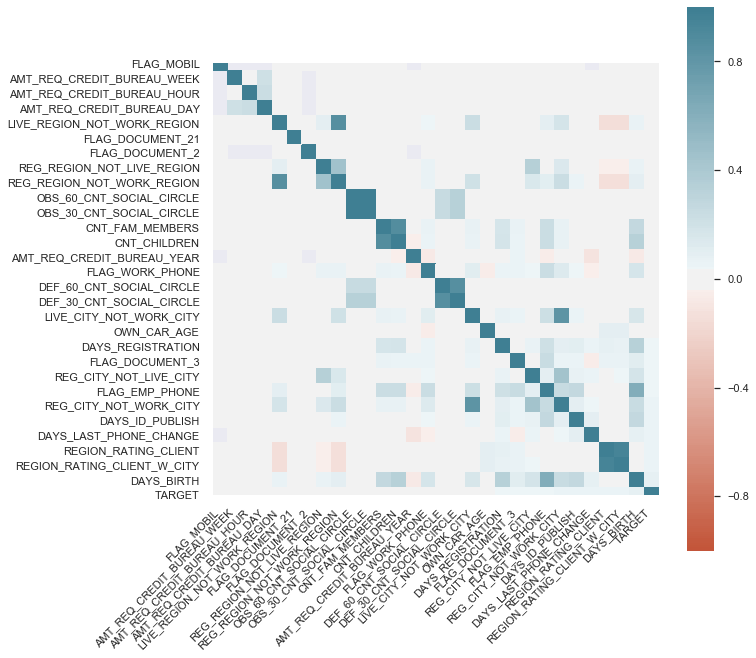

In [107]:
corr = application_train.loc[:,most_correlated_list].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### **CONCLUSION**: Here we get a broad glimpse of correlations between the features that we are interested in (i.e. features most correlated to TARGET already)

# 5. Focused researches on the ***less risky profile*** and the ***maximised rate*** 

At first, our goal is to analyse and explore the data in depth, focusing on the TARGET feature in `application_train.csv` and comparing other features to unveil a **typical profil** for the ***less risky client***.

Afterwards, how far can we go to ***maximise the interest rate***, and under what *financial* and *contextual* conditions will the client be willing to ***accept this maximized rate*** ?

## 5.1 Analysis to find the less *risky* client

To perform such an analysis, we will constantly compare the TARGET feature to other features. The goal here is to try to answer some of our questions and determine which feature is most correlated to the fact that a client defaults payment or not.

This function will allow us to plot two graphs:
* Loans summary: Summary of loans contracted per category in this feature
* Comparaison with the TARGET: plots the percentage of observations in which the client defaulted on payment, for each category

In [108]:
palette_list =['flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar','gist_stern', 'gist_yarg','hot', 'hsv', 'icefire', 'inferno', 'jet','magma', 'mako', 'nipy_spectral', 'ocean', 'plasma', 'prism', 'rocket', 'seismic', 'spring', 'summer', 'terrain',  'twilight',  'viridis',  'vlag', 'winter' ]
def compareToTarget(feature,dataframe):
    summary = dataframe[feature].value_counts()
    loans_summary = pd.DataFrame({feature: summary.index,'Number of loans contracted': summary.values})

    # Compute percentage of target=1 per category
    percentage_per_category = dataframe[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    percentage_per_category['TARGET'] = percentage_per_category[['TARGET']]*100
    percentage_per_category.sort_values(by='TARGET', ascending=False, inplace=True)
    
    #Define the plots
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    s = sns.barplot(ax=ax1, x = feature, y="Number of loans contracted",data=loans_summary,palette=random.choice(palette_list))
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=percentage_per_category[feature], data=percentage_per_category, palette=random.choice(palette_list))
    plt.ylabel('Percentage of payment default', fontsize=15)

    plt.show();

### ***On financial criterias***

##### `1.` Do previous applications in Credit Bureau & in Home Credit have any impact on the current default of payment of a client ?
- DAYS_CREDIT in `bureau.csv`: how many days before current application did client apply for Credit Bureau credit
- CREDIT_DAY_OVERDUE in `bureau.csv`: number of days past due on CB credit at the time of application for related loan in our sample
- DAYS_CREDIT_ENDDATE in `bureau.csv`: remaining duration of CB credit (in days) at the time of application in Home Credit

`previous_application.csv`


In [109]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


Let's add TARGET feature to the bureau df to make some comparaisons and analysis

In [110]:
bureau_x_apptrain = bureau.join(application_train, on='SK_ID_CURR',lsuffix='_bureau',rsuffix='_app_train')

Let's see what we have and save it to a variable (we will use it to make some other analysis later on.. )

In [111]:
mean_default = bureau_x_apptrain.loc[bureau_x_apptrain['CREDIT_DAY_OVERDUE'] > 225][['CREDIT_DAY_OVERDUE', 'TARGET']]

Here I just make some bins in order to make some room on the future x axis on our plot later on

In [112]:
bureau_x_apptrain['CREDIT_DAY_OVERDUE'] = pd.cut(bureau_x_apptrain['CREDIT_DAY_OVERDUE'], 100)

In [113]:
bureau_x_apptrain[['CREDIT_DAY_OVERDUE','TARGET']]

,CREDIT_DAY_OVERDUE,TARGET
0,"(-2.792, 27.92]",0.0
1,"(-2.792, 27.92]",0.0
2,"(-2.792, 27.92]",0.0
3,"(-2.792, 27.92]",0.0
4,"(-2.792, 27.92]",0.0
...,...,...
1716423,"(-2.792, 27.92]",0.0
1716424,"(-2.792, 27.92]",0.0
1716425,"(-2.792, 27.92]",0.0
1716426,"(-2.792, 27.92]",0.0


We want the mean of TARGET for every bin of CREDIT_DAY_OVERDUE

In [114]:
bureau_x_apptrain = bureau_x_apptrain.groupby('CREDIT_DAY_OVERDUE').mean()
bureau_x_apptrain[['TARGET']]

,TARGET
CREDIT_DAY_OVERDUE,
"(-2.792, 27.92]",0.080507
"(27.92, 55.84]",0.079096
"(55.84, 83.76]",0.082126
"(83.76, 111.68]",0.065789
"(111.68, 139.6]",0.074074
...,...
"(2652.4, 2680.32]",0.000000
"(2680.32, 2708.24]",0.000000
"(2708.24, 2736.16]",NaN


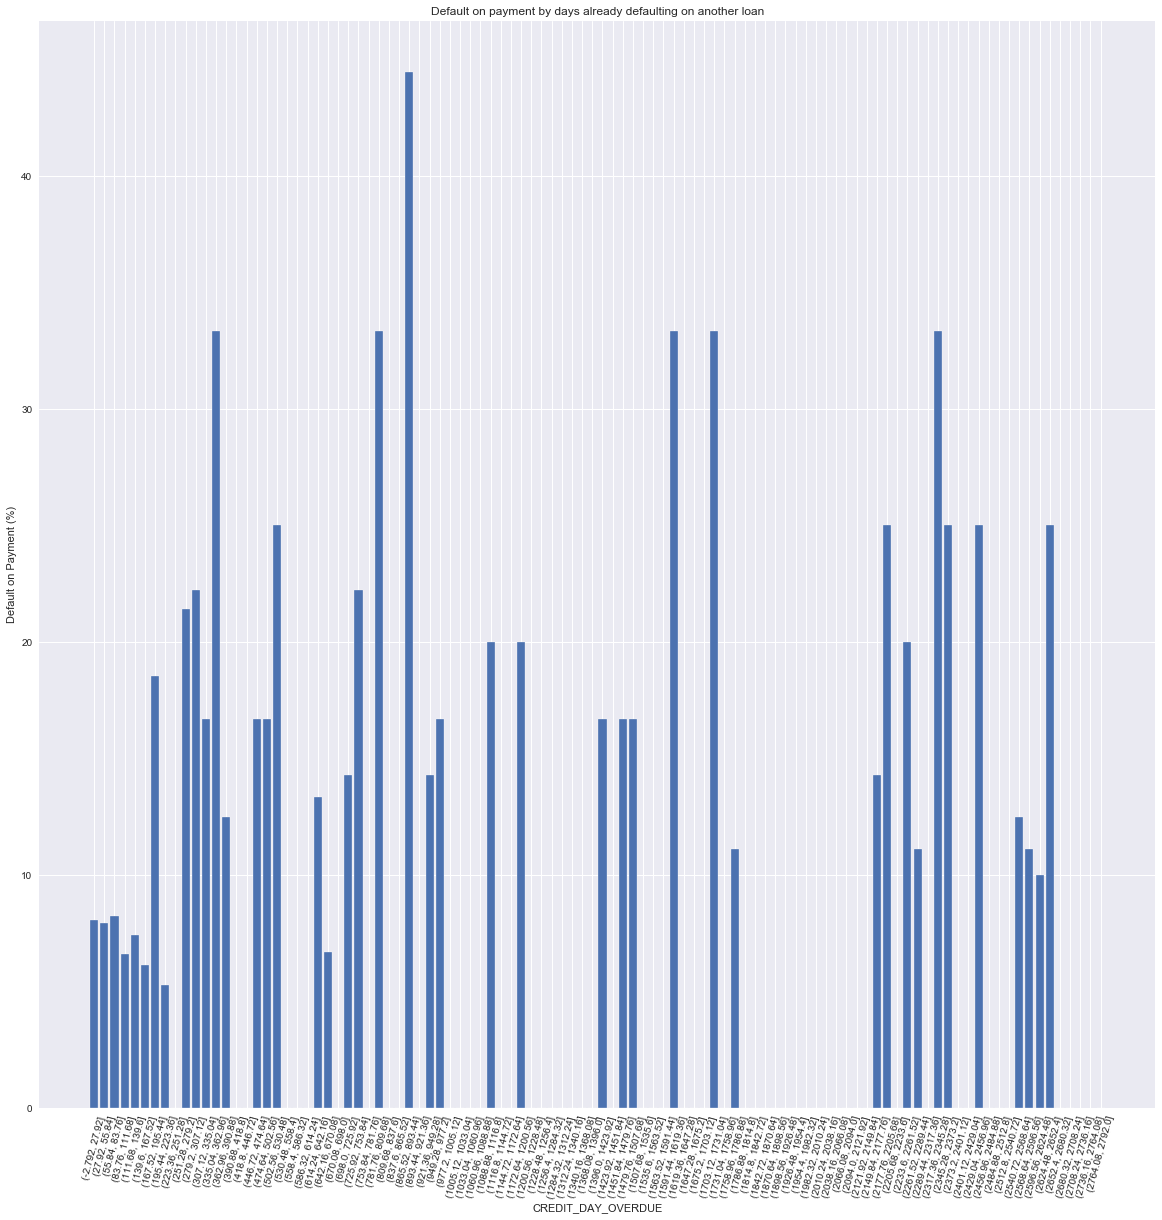

In [115]:
plt.style.use('seaborn')
plt.figure(figsize=(20,20))
plt.bar(bureau_x_apptrain.index.astype(str),100 * bureau_x_apptrain['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('CREDIT_DAY_OVERDUE'); plt.ylabel('Default on Payment (%)')
plt.title('Default on payment by days already defaulting on another loan');

Let's now analyse how much (in %) do clients with credit overdue over 225 days tend to default **on average**:

In [116]:
# We use mean_default, the variable we save earlier on, keeping only client > 225 days overdue
mean_default.dropna()['TARGET'].mean() * 100

8.880308880308881

### *CONCLUSION*: Even if this chart isn't very informative at first sight,we have to look between the lines :
* < 10% of clients with between 0 and 225 days overdue on another Credit Bureau loan default on payment eventually on HomeCredit loan ==> the maximum treshold to look at when according a loan to an *"already in debt"* client is **225 days of overdue MAXIMUM**
* if a client has over 225 days of overdue on a CB credit at the time of application for our HomeCredit loan, he has **almost 1 chance over 10 (8.9%) chance to default !! Be careful with this ones folks ..** 

##### `2.` Does the number of surroundings being in default of payment is a good indicator for the solvency of a client ?
- DEF_30_CNT_SOCIAL_CIRCLE in `application_train`
- DEF_60_CNT_SOCIAL_CIRCLE in `application_train`

In [117]:
application_train['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

Looking at the number of observations for each category, `7.0`, `8.0` and `34.0` seem to be outliers, so we won't take them into account.

In [118]:
application_train['DEF_30_CNT_SOCIAL_CIRCLE'] = application_train['DEF_30_CNT_SOCIAL_CIRCLE'].loc[application_train['DEF_30_CNT_SOCIAL_CIRCLE']< 7]
application_train[['DEF_30_CNT_SOCIAL_CIRCLE']]

,DEF_30_CNT_SOCIAL_CIRCLE
0,2.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
307506,0.0
307507,0.0
307508,0.0
307509,0.0


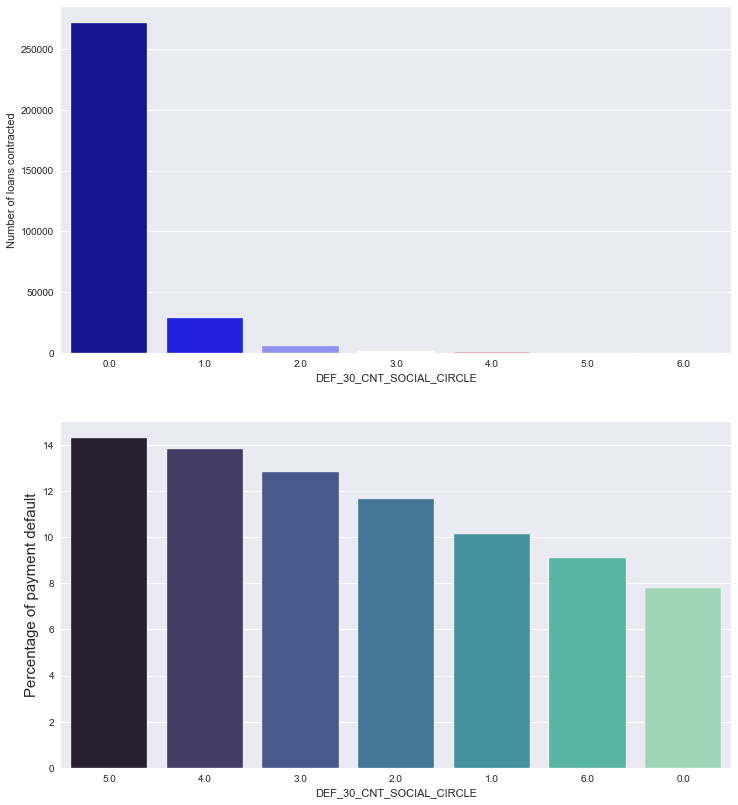

In [119]:
compareToTarget('DEF_30_CNT_SOCIAL_CIRCLE',application_train)

### ***CONCLUSION:*** Data show that most of the loans were contracted by clients with **good payers** as their surroundings (i.e. with no default of payment over the past month). It also shows that the more surroundings on default a client has, the greater the likelihood that this same customer will also default on his loan.

##### `3.` Could we define a 'ceiling alert' when a client announces the amount of credit he wishes, depending on how much credit did he ask on the previous application and if he defaulted on payment ?
- AMT_APPLICATION in `previous_application.csv` to compare with AMT_CREDIT and TARGET (link between dfs with SK_ID_CURRENT) 

In [120]:
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


**What percentage of previous applications were given at a lower amount than it was asked initially by the client on the application day ?**

In [121]:
print(len(previous_application.loc[(previous_application['AMT_APPLICATION'] > previous_application['AMT_CREDIT'])])/len(previous_application.loc[(previous_application['AMT_APPLICATION'] <= previous_application['AMT_CREDIT'])])*100)

27.252190820420534


We have to separate these 27% from the rest, creating two distincts dataframes:
* `app_sup_credit` for AMT_APPLICATION_previous_app > AMT_CREDIT_previous_app
* `app_inf_credit` for AMT_APPLICATION_previous_app <= AMT_CREDIT_previous_app

In [122]:
app_sup_credit = previous_application.loc[(previous_application['AMT_APPLICATION'] > previous_application['AMT_CREDIT'])]

In [123]:
app_inf_credit = previous_application.loc[(previous_application['AMT_APPLICATION'] <= previous_application['AMT_CREDIT'])]

We merge dataframes to get the TARGET feature in them

In [124]:
app_sup_credit = app_sup_credit.merge(application_train, how='left', on='SK_ID_CURR', suffixes=('_previous_app','_curr_app'))
app_sup_credit = app_sup_credit.rename(columns={"AMT_APPLICATION": "AMT_APPLICATION_previous_app"})

In [125]:
app_sup_credit[['AMT_APPLICATION_previous_app', 'AMT_CREDIT_previous_app','AMT_CREDIT_curr_app','TARGET']]

,AMT_APPLICATION_previous_app,AMT_CREDIT_previous_app,AMT_CREDIT_curr_app,TARGET
0,126490.5,119853.0,640080.0,0.0
1,74610.0,65610.0,254700.0,0.0
2,214380.0,209497.5,589045.5,0.0
3,35955.0,33115.5,675000.0,0.0
4,126544.5,101232.0,450000.0,0.0
...,...,...,...,...
357686,74250.0,66825.0,NaN,NaN
357687,248535.0,223681.5,1494486.0,0.0
357688,22869.0,20578.5,NaN,NaN
357689,87750.0,64291.5,NaN,NaN


In [126]:
app_inf_credit = app_inf_credit.merge(application_train, how='left', on='SK_ID_CURR', suffixes=('_previous_app','_curr_app'))
app_inf_credit = app_inf_credit.rename(columns={"AMT_APPLICATION": "AMT_APPLICATION_previous_app"})

In [127]:
app_inf_credit[['AMT_APPLICATION_previous_app', 'AMT_CREDIT_previous_app','AMT_CREDIT_curr_app','TARGET']]

,AMT_APPLICATION_previous_app,AMT_CREDIT_previous_app,AMT_CREDIT_curr_app,TARGET
0,17145.0,17145.0,533668.5,0.0
1,607500.0,679671.0,135000.0,0.0
2,112500.0,136444.5,284400.0,0.0
3,450000.0,470790.0,1687266.0,0.0
4,337500.0,404055.0,628069.5,0.0
...,...,...,...,...
1312517,112500.0,112500.0,675000.0,0.0
1312518,315000.0,436216.5,263686.5,0.0
1312519,267295.5,311400.0,NaN,NaN
1312520,180000.0,191880.0,284400.0,0.0


**What are the percentages of current defaults on payment, whether AMT_APPLICATION is superior or inferior to received credit ?**

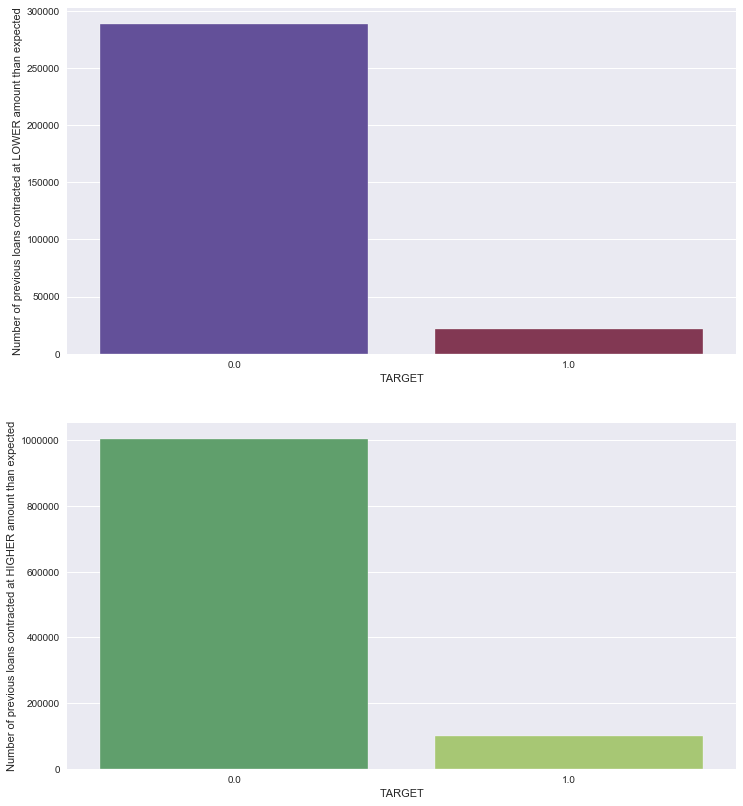

In [128]:
#Get data for AMT_APP > AMT_CREDIT
summary_sup = app_sup_credit['TARGET'].value_counts()
loans_summary_sup = pd.DataFrame({'TARGET': summary_sup.index,'Number of previous loans contracted at LOWER amount than expected': summary_sup.values})

#Get data for AMT_APP < AMT_CREDIT
summary_inf = app_inf_credit['TARGET'].value_counts()
loans_summary_inf = pd.DataFrame({'TARGET': summary_inf.index,'Number of previous loans contracted at HIGHER amount than expected': summary_inf.values})



fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
s = sns.barplot(ax=ax1,x = 'TARGET', y="Number of previous loans contracted at LOWER amount than expected",data=loans_summary_sup,palette=random.choice(palette_list))
s = sns.barplot(ax=ax2,x = 'TARGET', y="Number of previous loans contracted at HIGHER amount than expected",data=loans_summary_inf,palette=random.choice(palette_list))
plt.show();

Percentage of default when the demand is **superior** to the actual credit:

In [129]:
app_sup_credit_1 = app_sup_credit.loc[app_sup_credit['TARGET'] == 1]
app_sup_credit_0 = app_sup_credit.loc[app_sup_credit['TARGET'] == 0]
print(len(app_sup_credit_1)/len(app_sup_credit_0)*100)

7.381684656539633


Percentage of default when the demand is **inferior** to the actual credit:

In [130]:
app_inf_credit_1 = app_inf_credit.loc[app_inf_credit['TARGET'] == 1]
app_inf_credit_0 = app_inf_credit.loc[app_inf_credit['TARGET'] == 0]
print(len(app_inf_credit_1)/len(app_inf_credit_0)*100)

10.077392620481026


### **CONCLUSION**: 
It is a **tie**. The data here don't prove anything that could say "AMT_APPLICATION being > or < to the actual credit is impacting the default of payment in a certain way". 
H0 hypothesis hasn't been contradicted here, so this analysis does not bring any advance.

**Let's continue though !!**

### ***On contextual/behavioral criterias***

##### `1.`Is Age a criteria to better fullfil repayment ?
- DAYS_BIRTH in `application_train`


In [131]:
age = application_train[['TARGET', 'DAYS_BIRTH']]
age['YEARS_BIRTH'] = (age['DAYS_BIRTH'] / -365).round(0)
age = age.groupby('YEARS_BIRTH').mean()

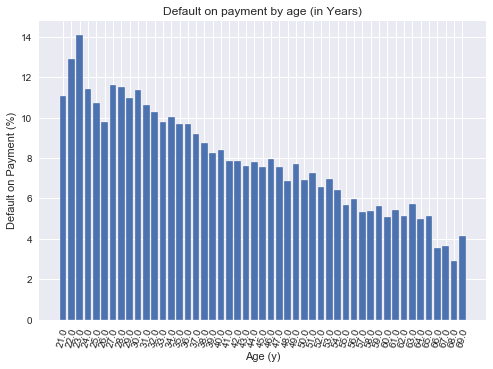

In [132]:
age.sort_values(by='TARGET',ascending=False)
plt.bar(age.index.astype(str), 100 * age['TARGET'])

plt.xticks(rotation = 75); plt.xlabel('Age (y)'); plt.ylabel('Default on Payment (%)')
plt.title('Default on payment by age (in Years)');

In [133]:
age = age.reset_index(level='YEARS_BIRTH', col_level=1, col_fill='YEARS_BIRTH')

In [134]:
age['YEARS_BIRTH'] = age['YEARS_BIRTH'].apply(lambda x: '< 45 yo' if x < np.mean(age['YEARS_BIRTH']) else '45 yo >')
age_pivot = pd.pivot_table(age, index=["YEARS_BIRTH"], values=["TARGET"], aggfunc=np.mean)
age_pivot

,TARGET
YEARS_BIRTH,
45 yo >,0.058178
< 45 yo,0.100551


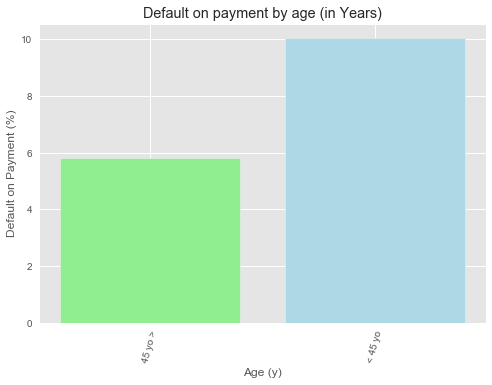

In [135]:
plt.style.use('ggplot')
plt.bar(age_pivot.index.astype(str),100 * age_pivot['TARGET'],color=['lightgreen','lightblue'])
plt.xticks(rotation = 75); plt.xlabel('Age (y)'); plt.ylabel('Default on Payment (%)')
plt.title('Default on payment by age (in Years)');

### ***CONCLUSION:*** The data show that the **younger** a client is, the more likely she/he is to default on a loan !

##### `2.` Is Gender a criteria to better fullfil repayment ?
- CODE_GENDER in `application_train`

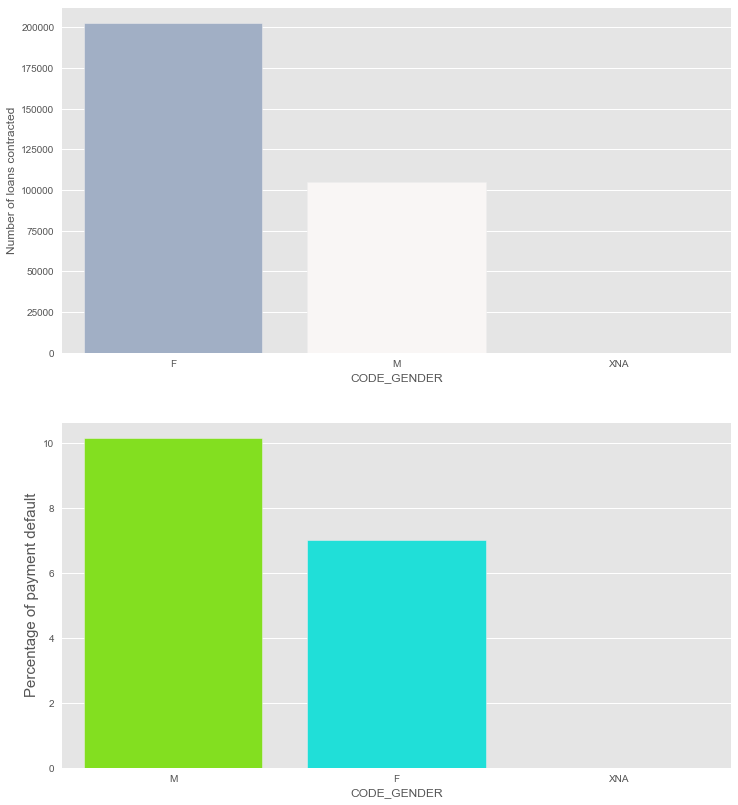

In [136]:
compareToTarget('CODE_GENDER', application_train)

### ***CONCLUSION:*** 
* The first bar chart indicates what we already know: 2/3 of the contracted loans are made by women, vs 1/3 for men.
* The second graph is **a lot more informative**: in comparaison to women, men default on repayment more, with 0.3 points of difference !!

##### `3.` Family situation

- CNT_CHILDREN in `application_train`
- NAME_FAMILY_STATUS in `application_train`




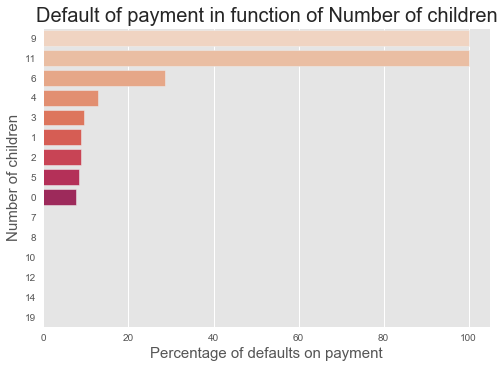

In [138]:
# Compute percentage of target=1 per category
percentage_per_category = application_train[['CNT_CHILDREN', 'TARGET']].groupby(['CNT_CHILDREN'],as_index=False).mean()
percentage_per_category['TARGET'] = percentage_per_category[['TARGET']]*100
percentage_per_category.sort_values(by='TARGET', ascending=False, inplace=True)
    
#Define the plots
s = sns.barplot(x = 'TARGET', y='CNT_CHILDREN', order=percentage_per_category['CNT_CHILDREN'], data=percentage_per_category,palette="rocket_r", orient="h")
plt.ylabel('Number of children', fontsize=15)
plt.xlabel('Percentage of defaults on payment', fontsize=15)
plt.title('Default of payment in function of Number of children', fontsize=20)
plt.show();

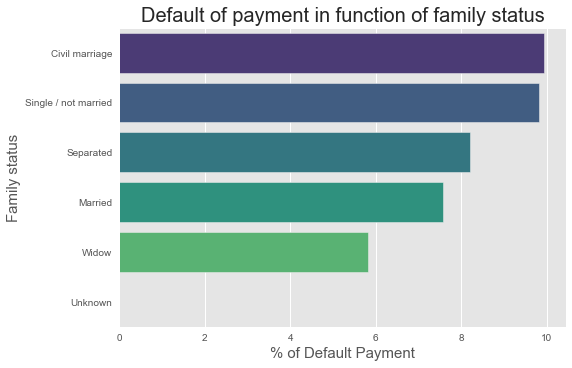

In [139]:
# Compute percentage of target=1 per category
percentage_per_category = application_train[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean()
percentage_per_category['TARGET'] = percentage_per_category[['TARGET']]*100
percentage_per_category.sort_values(by='TARGET', ascending=False, inplace=True)
    
#Define the plots
s = sns.barplot(x = 'TARGET', y='NAME_FAMILY_STATUS', order=percentage_per_category['NAME_FAMILY_STATUS'], data=percentage_per_category,palette="viridis", orient="h")
plt.ylabel('Family status', fontsize=15)
plt.xlabel('% of Default Payment', fontsize=15)
plt.title('Default of payment in function of family status', fontsize=20)
plt.show();

### ***CONCLUSION:*** 
* First chart confirms that large families tend to default on payment more than other families (even if they is not much observations of families with 9 or 10 children)
* Second chart shows that surprisingly enough, cil married couples are the ones who default on payment the most. The position of the single /not married clients is understandable (i.e. no joint account, less income)

##### `4.` Does the purpose of the previous cash loan tells the future of the client's behavior (`previous_application.csv`)

 - NAME_CASH_LOAN_PURPOSE

First we have to join the two distincts data sets to get the TARGET feature

In [140]:
len(previous_application['SK_ID_CURR'].unique())

338857

In [141]:
previous_x_curr = previous_application.merge(application_train, how='left', on='SK_ID_CURR')

In [142]:
previous_x_curr[['SK_ID_CURR','NAME_CASH_LOAN_PURPOSE','TARGET']]

,SK_ID_CURR,NAME_CASH_LOAN_PURPOSE,TARGET
0,271877,XAP,0.0
1,108129,XNA,0.0
2,122040,XNA,0.0
3,176158,XNA,0.0
4,202054,Repairs,0.0
...,...,...,...
1670209,352015,XAP,NaN
1670210,334635,XAP,NaN
1670211,249544,XAP,0.0
1670212,400317,XNA,0.0


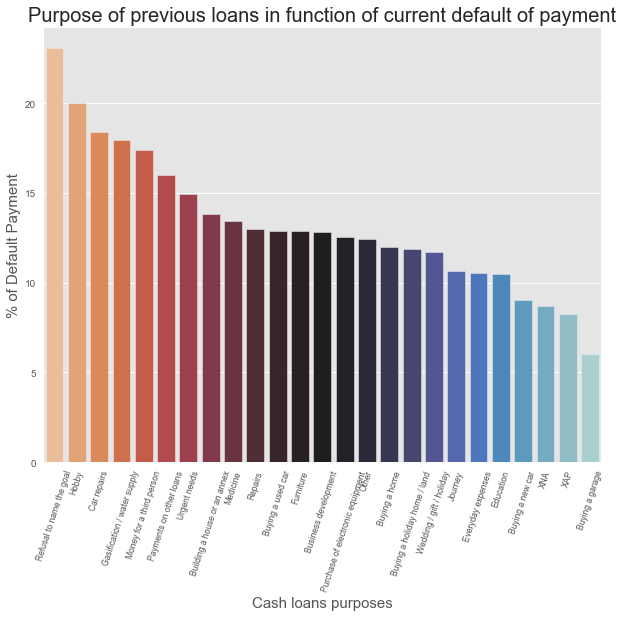

In [143]:
# Compute percentage of target=1 per category
percentage_per_category = previous_x_curr[['NAME_CASH_LOAN_PURPOSE', 'TARGET']].groupby(['NAME_CASH_LOAN_PURPOSE'],as_index=False).mean()
percentage_per_category['TARGET'] = percentage_per_category[['TARGET']]*100
percentage_per_category.sort_values(by='TARGET', ascending=False, inplace=True)
    
#Define the plots
plt.figure(figsize=(10,8))
sns.barplot(x = 'NAME_CASH_LOAN_PURPOSE', y='TARGET', order=percentage_per_category['NAME_CASH_LOAN_PURPOSE'], data=percentage_per_category,palette="icefire_r", orient="v")
plt.ylabel('% of Default Payment', fontsize=15)
plt.xlabel('Cash loans purposes', fontsize=15)
plt.xticks(rotation = 72,fontsize=8.5)
plt.title('Purpose of previous loans in function of current default of payment', fontsize=20)
plt.show();

### ***CONCLUSION:*** The pattern of the bar chart reveals multiple infos:
* Obviously when clients refused to name the goal of the loan, they defaulted more than the others (22% in average)
* Goals that aren't "long terms investments" (.i.e. buying a home, education) are more subject to default than the others

## 5.2 Analysis to find the best rate

In order to compute the `interest_rate`, we use a numpy function similar to RATE in excel. The parameters are the following:
        - nper: number of periods. Since Home Credit offers loans from 12-month period to 48 months, we assume that the mean number of periods is 2 years (https://www.homecredit.co.in/personal-loan)
        - pmt: the AMT_ANNUITY
        - present_value: O in our case to simplify the case
        - future_value: what to be reimbursed in total, so AMT_CREDIT

In [144]:
def interest_rate(amount, annuity):
    interest_rate = np.rate(2,-annuity,0,amount)
    return interest_rate

Let's compute this interest rate for every loan negociated at Home Credit

In [145]:
application_train['INTEREST_RATE'] = application_train.apply(lambda x: interest_rate(x['AMT_CREDIT'],x['AMT_ANNUITY']), axis=1)


In [146]:
application_train[['INTEREST_RATE']].sort_values(by='INTEREST_RATE', ascending=False)

,INTEREST_RATE
202366,43.305079
85632,43.302013
62194,43.298281
45179,43.295526
69092,43.293929
...,...
123872,NaN
207186,NaN
227939,NaN
239329,NaN


### ***On financial criterias***

##### `1.` Does being among the firsts to make an offer for a loan change something for the negociations over interest rate ?

- AMT_REQ_CREDIT_BUREAU_YEAR in `application_train.csv` to compare with INTEREST_RATE

**What does AMT_REQ_CREDIT_BUREAU_YEAR represent ?**
It is the "Number of enquiries to Credit Bureau about the client one year before application (excluding 3 last months)". It is then a good indicator for knowing **how many other credit providers services requested a report to Credit Bureau for this client in the past year**, meaning **how many services did the client visit to find the best loan possible !**

**What do we hope to find out ?**
We want to know if being among the first credit institutions consulted by a client makes it possible to negotiate a loan at a higher interest rate, as ***he didn't get counteroffers yet*** !

In [147]:
application_train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

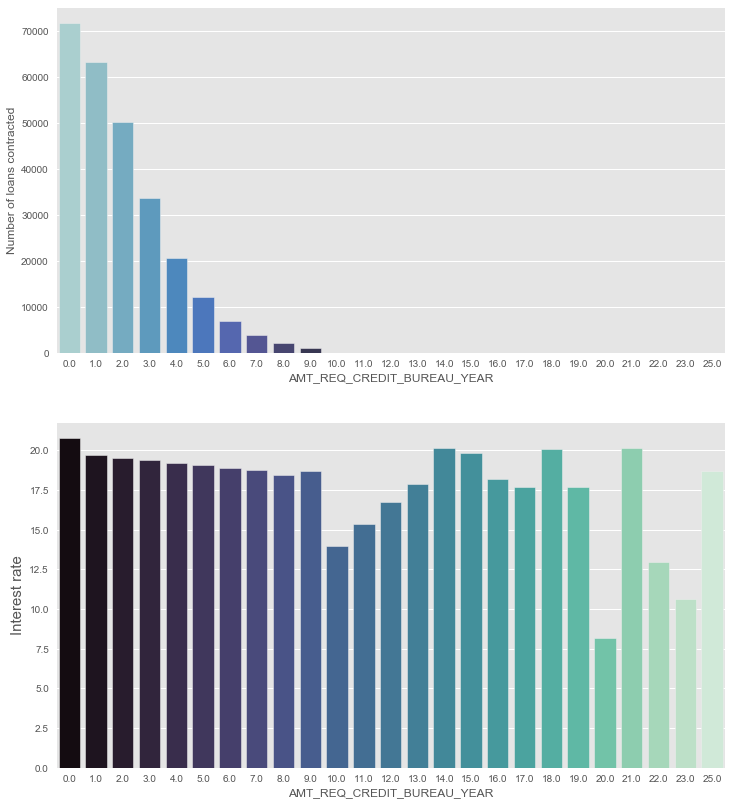

In [148]:
summary = application_train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()
loans_summary = pd.DataFrame({'AMT_REQ_CREDIT_BUREAU_YEAR': summary.index,'Number of loans contracted': summary.values})

# Compute percentage of y_feature per x_feature
percentage_per_category = application_train[['AMT_REQ_CREDIT_BUREAU_YEAR', 'INTEREST_RATE']].groupby(['AMT_REQ_CREDIT_BUREAU_YEAR'],as_index=False).mean()
percentage_per_category.sort_values(by='AMT_REQ_CREDIT_BUREAU_YEAR', ascending=True, inplace=True)

#Define the plots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
s = sns.barplot(ax=ax1, x = 'AMT_REQ_CREDIT_BUREAU_YEAR', y="Number of loans contracted",data=loans_summary,palette="icefire")
s = sns.barplot(ax=ax2, x = 'AMT_REQ_CREDIT_BUREAU_YEAR', y='INTEREST_RATE', order=percentage_per_category['AMT_REQ_CREDIT_BUREAU_YEAR'], data=percentage_per_category, palette="mako")
plt.ylabel('Interest rate', fontsize=15)

plt.show();

### ***CONCLUSION:*** The pattern of the bar chart reveals multiple infos.
Regarding the number of enquiries made in the past year to Credit Bureau, people having consulted:
- < 9 other credit services : will be able to accept a higher interest rate, since they didn't probably get a lower counter-offer yet
- 10 < x < 15: they probably receive a better loan at a lower interest rate (10), but progressively accept a higher price as they continue to search

##### `3.` What effect over repayment does the amount of credit plays ? A difference whether it is superior or inferior to total income of client ?
- AMT_INCOME_TOTAL & AMT_CREDIT in `application_train.csv`

In [150]:
def sup_or_inf(income, credit):
    if income > credit:
        return 'CREDIT < INCOME'
    elif income <= credit:
        return 'CREDIT > INCOME'

In [151]:
application_train['SUP_OR_INF'] = application_train.apply(lambda x: sup_or_inf(x['AMT_INCOME_TOTAL'],x['AMT_CREDIT']), axis=1)
application_train['SUP_OR_INF']

0         CREDIT > INCOME
1         CREDIT > INCOME
2         CREDIT > INCOME
3         CREDIT > INCOME
4         CREDIT > INCOME
               ...       
307506    CREDIT > INCOME
307507    CREDIT > INCOME
307508    CREDIT > INCOME
307509    CREDIT > INCOME
307510    CREDIT > INCOME
Name: SUP_OR_INF, Length: 307511, dtype: object

In [152]:
pivoted = pd.pivot_table(application_train,values=['SK_ID_CURR'],columns=['TARGET'],index=['SUP_OR_INF'], aggfunc=len)
pivoted

SK_ID_CURR       
TARGET                   0      1
SUP_OR_INF                       
CREDIT < INCOME      13305    933
CREDIT > INCOME     269381  23892

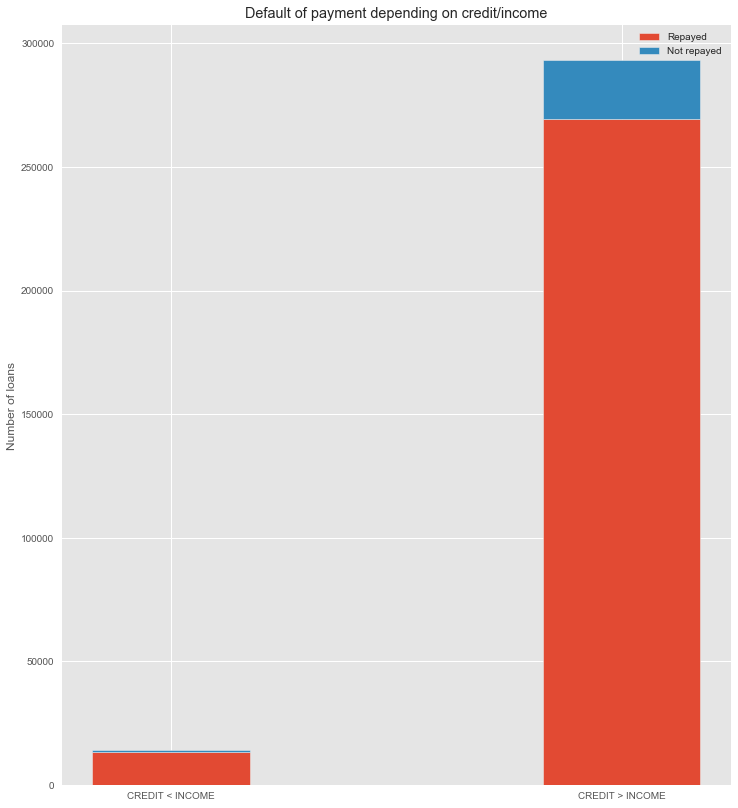

In [153]:
fig, ax = plt.subplots(figsize=(12,14))
ax.bar(['CREDIT < INCOME', 'CREDIT > INCOME'], pivoted['SK_ID_CURR'][0], 0.35, label='Repayed')
ax.bar(['CREDIT < INCOME', 'CREDIT > INCOME'], pivoted['SK_ID_CURR'][1], 0.35, bottom=pivoted['SK_ID_CURR'][0], label='Not repayed')

ax.set_ylabel('Number of loans ')
ax.set_title('Default of payment depending on credit/income')
ax.legend()

plt.show()

### ***CONCLUSION:*** Offering a credit with an amount **superior** to the client's total income is ***riskier***:
- 7% of clients whose CREDIT < INCOME don't repay
- 9% of clients whose CREDIT > INCOME don't repay

#### `4.` In the case of CREDIT > INCOME, at what percentage can it be said that the amount of credit is too high to be properly repaid?

- (AMT_CREDIT/AMT_INCOME*100) in `application_train`compared to TARGET

In [154]:
application_train['% OF INCOME'] = application_train['AMT_INCOME_TOTAL']/application_train['AMT_CREDIT']*100

treshold = application_train.loc[application_train['SUP_OR_INF'] == 'CREDIT > INCOME'][['% OF INCOME', 'SUP_OR_INF', 'TARGET']]
treshold.round(1)

,% OF INCOME,SUP_OR_INF,TARGET
0,49.8,CREDIT > INCOME,1
1,20.9,CREDIT > INCOME,0
2,50.0,CREDIT > INCOME,0
3,43.2,CREDIT > INCOME,0
4,23.7,CREDIT > INCOME,0
...,...,...,...
307506,61.8,CREDIT > INCOME,0
307507,26.7,CREDIT > INCOME,0
307508,22.6,CREDIT > INCOME,0
307509,46.2,CREDIT > INCOME,1


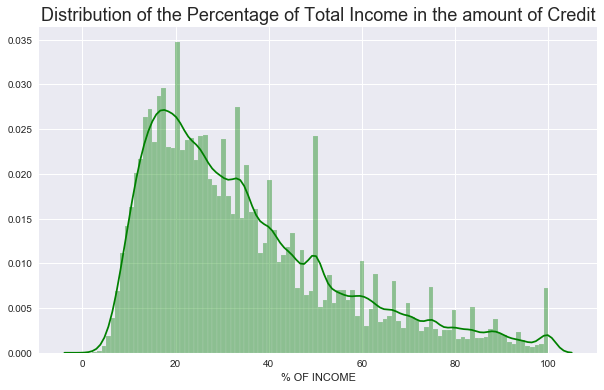

In [155]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
plt.title("Distribution of %s" % 'the Percentage of Total Income in the amount of Credit', size=(18))
sns.distplot(treshold['% OF INCOME'].dropna(),color='green', kde=True,bins=100)
plt.show() 

Text(0.5, 0, '% of Income in the amount of Credit')

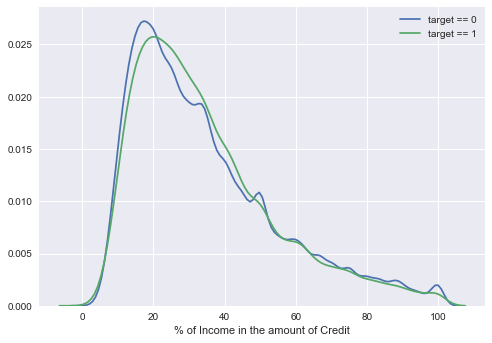

In [156]:
# plot repaid loans
sns.kdeplot(treshold.loc[treshold['TARGET'] == 0, '% OF INCOME'], label = 'target == 0')
# plot loans that were not repaid
sns.kdeplot(treshold.loc[treshold['TARGET'] == 1, '% OF INCOME'], label = 'target == 1')
plt.xlabel('% of Income in the amount of Credit')

In [157]:
treshold['% OF INCOME'] = treshold[['% OF INCOME']].round(0)
treshold

,% OF INCOME,SUP_OR_INF,TARGET
0,50.0,CREDIT > INCOME,1
1,21.0,CREDIT > INCOME,0
2,50.0,CREDIT > INCOME,0
3,43.0,CREDIT > INCOME,0
4,24.0,CREDIT > INCOME,0
...,...,...,...
307506,62.0,CREDIT > INCOME,0
307507,27.0,CREDIT > INCOME,0
307508,23.0,CREDIT > INCOME,0
307509,46.0,CREDIT > INCOME,1


In [158]:
treshold = treshold.groupby('% OF INCOME').mean()
treshold.index

Float64Index([  1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
               10.0,  11.0,  12.0,  13.0,  14.0,  15.0,  16.0,  17.0,  18.0,
               19.0,  20.0,  21.0,  22.0,  23.0,  24.0,  25.0,  26.0,  27.0,
               28.0,  29.0,  30.0,  31.0,  32.0,  33.0,  34.0,  35.0,  36.0,
               37.0,  38.0,  39.0,  40.0,  41.0,  42.0,  43.0,  44.0,  45.0,
               46.0,  47.0,  48.0,  49.0,  50.0,  51.0,  52.0,  53.0,  54.0,
               55.0,  56.0,  57.0,  58.0,  59.0,  60.0,  61.0,  62.0,  63.0,
               64.0,  65.0,  66.0,  67.0,  68.0,  69.0,  70.0,  71.0,  72.0,
               73.0,  74.0,  75.0,  76.0,  77.0,  78.0,  79.0,  80.0,  81.0,
               82.0,  83.0,  84.0,  85.0,  86.0,  87.0,  88.0,  89.0,  90.0,
               91.0,  92.0,  93.0,  94.0,  95.0,  96.0,  97.0,  98.0,  99.0,
              100.0],
             dtype='float64', name='% OF INCOME')

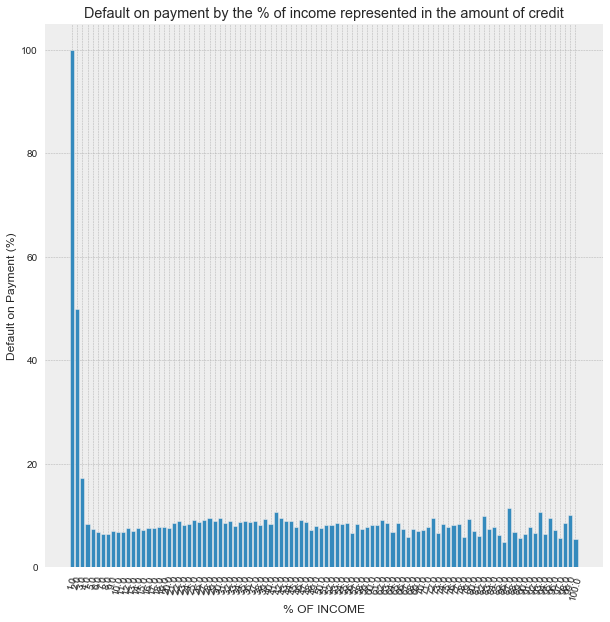

In [159]:
plt.style.use('bmh')
plt.figure(figsize=(10,10))
plt.bar(treshold.index.astype(str),100 * treshold['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('% OF INCOME'); plt.ylabel('Default on Payment (%)')
plt.title('Default on payment by the % of income represented in the amount of credit');

In [160]:
treshold = application_train.loc[application_train['SUP_OR_INF'] == 'CREDIT > INCOME'][['% OF INCOME', 'SUP_OR_INF', 'TARGET']]
treshold.loc[treshold['% OF INCOME'] < 5]['TARGET'].value_counts()

0    212
1     23
Name: TARGET, dtype: int64

### ***CONCLUSION:***  It appears that when the client's total income is less than about 5% of the loan amount, default is virtually assured in more than 1 out of 10 chances.

### ***On contextual/behavioral criterias***

##### `1.` Effect on interest regarding the day the contract was signed
-WEEKDAY_APPR_PROCESS_START in `application_train` to compare to INTEREST_RATE

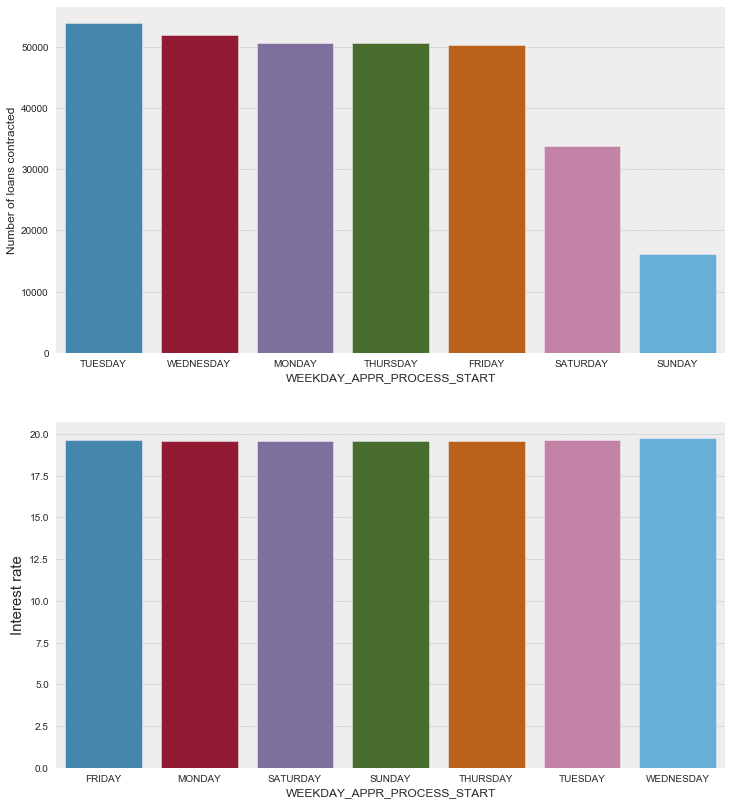

In [161]:
summary = application_train['WEEKDAY_APPR_PROCESS_START'].value_counts()
loans_summary = pd.DataFrame({'WEEKDAY_APPR_PROCESS_START': summary.index,'Number of loans contracted': summary.values})

# Compute percentage of y_feature per x_feature
percentage_per_category = application_train[['WEEKDAY_APPR_PROCESS_START', 'INTEREST_RATE']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean()
percentage_per_category.sort_values(by='WEEKDAY_APPR_PROCESS_START', ascending=True, inplace=True)

#Define the plots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
s = sns.barplot(ax=ax1, x = 'WEEKDAY_APPR_PROCESS_START', y="Number of loans contracted",data=loans_summary)
s = sns.barplot(ax=ax2, x = 'WEEKDAY_APPR_PROCESS_START', y='INTEREST_RATE', order=percentage_per_category['WEEKDAY_APPR_PROCESS_START'], data=percentage_per_category)
plt.ylabel('Interest rate', fontsize=15)

plt.show();

### ***CONCLUSION:*** The first chart shows clearly that contracts are contracted in a fairly equivalent way during the week, but we obviously notice a decrease during the week-end. On the other hand, there is no indication that the days of the week influence the negotiated interest rates.

#### `2.` Does the fact that the client were accompanied or not when applying for the loan change something to negociations ?

* NAME_TYPE_SUITE in `application_train`


In [162]:
accompanied_or_not = application_train[['NAME_TYPE_SUITE', '% OF INCOME', 'INTEREST_RATE']].round(2)
accompanied_or_not['NAME_TYPE_SUITE'] = accompanied_or_not['NAME_TYPE_SUITE'].apply(lambda x: 'Unaccompanied' if x == 'Unaccompanied' else 'Accompanied')
accompanied_or_not

,NAME_TYPE_SUITE,% OF INCOME,INTEREST_RATE
0,Unaccompanied,49.80,14.46
1,Accompanied,20.87,34.23
2,Unaccompanied,50.00,18.00
3,Unaccompanied,43.17,8.53
4,Unaccompanied,23.68,21.46
...,...,...,...
307506,Unaccompanied,61.84,7.24
307507,Unaccompanied,26.71,20.46
307508,Unaccompanied,22.58,20.60
307509,Unaccompanied,46.20,16.32


/Users/nicolas/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


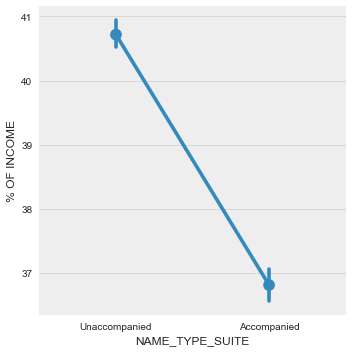

In [163]:
sns.factorplot(data=accompanied_or_not,x='NAME_TYPE_SUITE', y='% OF INCOME')

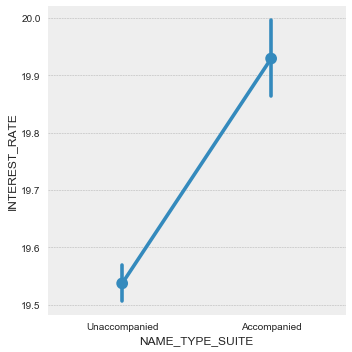

In [164]:
sns.factorplot(data=accompanied_or_not,x='NAME_TYPE_SUITE', y='INTEREST_RATE')

### ***CONCLUSION:*** The results have to be carefully scrutinized here:
* % OF INCOME plot shows that when they are **accompanied**, people tend to take ***more risks***, as the share of their total income in the total amount of credit shrinks. 
* NAME_TYPE_SUITE plot confirms this analysis, since the **interest rate negociated is slightly higher for accompanied clients**.

# 6. Predicting who will pay, and who won't

Rather than analysing static data and comparing graphs to find some hints, we could also try to **predict** whether a futur client will be a good payer (i.e. paying his debts on time) thanks to machine learning.

Since I have already made a Neural Network for another competition 'Titanic Disaster' (profile *undefin_0d* on Kaggle), I will use the same NN structure but modify the parameters, the goal being exactly the same: predicting an *absolute output* (i.e. TARGET == 0 / TARGET == 1) with labeled data (***hence allowing the supervised deep learning***)

I will put the code on the Jupyter Notebook but **won't run it** considering my CPU environment. Nevertheless I ran it on Google Colab with the *GPU mode* on, and I put my `submissions.csv` file here.

## 6.1 Data Preparation

We import some important modules such as scikit-learn, and torch later on

In [92]:
dummy_function_that_will_stop_the_notebook()

NameError: name 'dummy_function_that_will_stop_the_notebook' is not defined

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Clean and modify the data
We have to:
1. delete non important columns that we won't take into account in our model
2. convert categorical variable into dummy/indicator variables with ***get_dummies*** and concat them to the df
3. drop the old columns with categorical variables no longer useful
4. clean data from NA values, fill them with the mean()
5. put the columns with titles aside before asigning the scalars
6. multiply each train and test dataframes by a scalar
7. save features and target names in separate variables
8. create n dimensional arrays with features ('X_train') and the targets for each ('Y_train')

In [ ]:
#Delete non important columns that we won't take into account in our model
for row in most_missing.sort_values(by='Percentage',ascending=False).round(1)[most_missing['Percentage'] > 20].iterrows():
    name_column = list(row)
    name_column = [str(i).split('\n',1)[0] for i in name_column]
    name_column = name_column[1].split()[1]
    application_train.drop([name_column],axis=1,inplace=True)
    application_test.drop( [name_column],axis=1,inplace=True)

#TRAIN: Convert categorical variable into dummy/indicator variables with get_dummies and concat them to the df
for index, dtype in application_train.dtypes.iteritems():
    if dtype == object:
        normalized_column = pd.get_dummies(application_train[index],drop_first=True)
        application_train = pd.concat([application_train,normalized_column],axis=1)
        #Drop the old columns with categorical variables no longer useful
        application_train.drop([index],axis=1,inplace=True)

#TEST: Convert categorical variable into dummy/indicator variables with get_dummies and concat them to the df
for index, dtype in application_test.dtypes.iteritems():
    if dtype == object:
        normalized_column = pd.get_dummies(application_test[index],drop_first=True)
        application_test = pd.concat([application_test,normalized_column],axis=1)
        #Drop the old columns with categorical variables no longer useful
        application_test.drop([index],axis=1,inplace=True)

It appears that we have some duplicates after this manipulation, so let's find them and delete them

In [ ]:
def getDuplicatesWithCount(listOfElems):
    ''' Get frequency count of duplicate elements in the given list '''
    dictOfElems = dict()
    # Iterate over each element in list
    for elem in listOfElems:
        # If element exists in dict then increment its value else add it in dict
        if elem in dictOfElems:
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
 
    # Filter key-value pairs in dictionary. Keep pairs whose value is greater than 1 i.e. only duplicate elements from list.
    dictOfElems = { key:value for key, value in dictOfElems.items() if value > 1}
    # Returns a dict of duplicate elements and thier frequency count
    return dictOfElems

In [ ]:
dictOfElems = getDuplicatesWithCount(application_train.columns)     
for key, value in dictOfElems.items():
        print(key , ' :: ', value)

In [ ]:
dictOfElems = getDuplicatesWithCount(application_test.columns)     
for key, value in dictOfElems.items():
        print(key , ' :: ', value)

Let's drop the geminis

In [ ]:
application_train.drop(['Maternity leave','Unknown','XNA','Y',], axis=1,inplace=True)
application_test.drop(['Y','XNA'], axis=1,inplace=True)
len(set(application_train)) && len(set(application_test))

Seems good, application_train has theorically one more column than application_test, and it should be 'TARGET'. Let's see:

In [ ]:
missing = []
for column in application_train.columns:
    if column not in application_test.columns:
         missing.append(column)
missing

Perfect ! Now it is time for us to **normalize the data**. To do that, I use **scalar multiplication** for each column, **except 'TARGET'** as we want to keep it as it is. Otherwise, we won't be able to perform Binary Cross Entropy on it.

In [ ]:
#Clean data from NA values, fill them with the mean()
application_train.fillna(application_train.mean(),inplace=True)
application_test.fillna(application_test.mean(),inplace=True)

#Put aside TARGET column in app_train
application_train_target = pd.DataFrame({'TARGET':application_train['TARGET']})

#Put the columns with titles aside before asigning the scalars
train_columns = application_train.loc[:, application_train.columns != 'TARGET'].columns
test_columns  = application_test.columns

#Multiply each train and test dataframes by a scalar
Scaler1 = StandardScaler()
Scaler2 = StandardScaler()
application_train = pd.DataFrame(Scaler1.fit_transform(application_train.loc[:, application_train.columns != 'TARGET']))
application_test  = pd.DataFrame(Scaler2.fit_transform(application_test))

#Reput the write column titles
application_train.columns = train_columns
application_test.columns  = test_columns

#Reassign TARGET in app_train
application_train['TARGET'] = application_train_target

application_train
#Save features and target names in separate variables
features = application_train.iloc[:,2:].columns.tolist()
target   = application_train.loc[:, 'TARGET'].name

#Create n dimensional arrays with features ('X_train') and the targets for each ('Y_train')
X_train = application_train.iloc[:,2:].values
y_train = application_train.loc[:,'TARGET'].values

#Create n dimensional arrays with features ('X_test')
X_test = application_test.iloc[:,1:].values

Let's check what we obtain after this transformation:

In [ ]:
application_train

Fantastic !! Now, we will be able to pass the data through our future Neural Net.

## 6.2 Neural Network Encoding

### Import Pytorch

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

### Define and initialize the dataloaders (with the mini batch size)

In [ ]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [ ]:
batch_size = 2000
n_epochs = 30
batch_no = len(X_train) // batch_size

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

Let's examine how much features we get after the normalization of the data, to align this number with the inital inputs of the NN:

In [ ]:
len(features)

### Create Pytorch Regression Model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(148, 296)
        self.layer2 = nn.Linear(296, 148)
        self.layer3 = nn.Linear(148, 74)
        self.layer_out = nn.Linear(74, 1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(296)
        self.batchnorm2 = nn.BatchNorm1d(148)
        self.batchnorm3 = nn.BatchNorm1d(74)
        
        
    def forward(self, inputs):
        #print('Shape of inputs:',inputs.shape)
        x = self.relu(self.layer1(inputs))
        #print('Shape of x after relu.layer1', x.shape)
        x = self.batchnorm1(x)
        #print('Shape of x after batchnorm1', x.shape)
        x = self.relu(self.layer2(x))
        #print('Shape of x after relu.layer2', x.shape)
        x = self.batchnorm2(x)
        #print('Shape of x after batchnorm2', x.shape)
        x = self.relu(self.layer3(x))
        #print('Shape of x after relu.layer3', x.shape)
        x = self.batchnorm3(x)
        x = self.dropout(x)
        #print('Shape of x after dropout', x.shape)
        x = self.layer_out(x)
        return x

In [ ]:
ngpu = 1
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(device)

model = Net()
model.to(device)
print(model)

### Create Loss Function (MSE)

In [ ]:
criterion = nn.BCEWithLogitsLoss()

### Create Backprop Function

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Accuracy check function
In the middle of all this configuration of the NN, we will also want to check the accuracy of the model to see how it performs. Let's build a function for it:

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

## 6.3 Train the Pytorch NN

In [ ]:
model.train()
for e in range(1, n_epochs+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        output = model(X_batch)
        loss = criterion(output, y_batch.unsqueeze(1))
        acc = binary_acc(output, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        #print(loss.item())
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

## 6.4 Predict with the test dataset

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

### Submit results in .csv file

In [ ]:
submission = pd.DataFrame({'SK_ID_CURR': application_sub['SK_ID_CURR'], 'TARGET': target})
submission.to_csv('submission.csv', index=False)

In [ ]:
submission[:20]

### The results
The model succeeded only in predicting the right answer 51.5% of the time. I didn't have the time to adjust parameters, layers of the Multiperceptron etc to get better results.

![results_model.jpeg](results_model.png)